In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#df = pd.read_csv('Data/Processed_data.csv', index_col=[0])
df = pd.read_csv('Data/MICE_data.csv', index_col=[0])

/rds/general/user/cam119/home/anaconda3/envs/ML_project/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [26]:
#df.columns.get_loc('birthweight_g')

In [3]:
df.head()

,birth_attendant,birth_place,bmi,cigs_before_preg,birthweight_g,last_norm_menses_mn,last_norm_menses_yr,birth_mn,birth_time,birth_dy,...,prior_births_dead,prior_births_living,prior_terminations,prepreg_weight,delivery_method,res_status,prev_cesarean,num_prev_cesareans,infant_sex,weight_gain
0,1.0,1.0,30.7,0.0,3657.0,4.000000,2017.000000,1.0,1227.0,2.0,...,0.0,1.0,2.0,190.0,1.0,2.0,0.0,0.0,1.0,41.0
1,1.0,1.0,33.3,2.0,3242.0,6.811794,2016.777958,1.0,1704.0,2.0,...,0.0,2.0,0.0,188.0,4.0,2.0,1.0,2.0,0.0,0.0
2,1.0,1.0,30.0,0.0,3470.0,4.000000,2017.000000,1.0,336.0,2.0,...,0.0,1.0,0.0,215.0,1.0,1.0,0.0,0.0,1.0,58.0
3,3.0,1.0,23.7,0.0,3140.0,5.000000,2017.000000,1.0,938.0,2.0,...,0.0,2.0,0.0,138.0,1.0,2.0,0.0,0.0,0.0,0.0
4,1.0,1.0,35.5,0.0,2125.0,6.822145,2016.826229,1.0,830.0,3.0,...,0.0,1.0,4.0,220.0,3.0,1.0,0.0,0.0,1.0,0.0


### Linear Regression

In [4]:
X = df.drop(['birthweight_g'], axis=1)
y = df['birthweight_g']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
coeff_df = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
birth_attendant,28.233325
birth_place,6.410033
bmi,13.659457
cigs_before_preg,-5.717827
last_norm_menses_mn,-249.715973
last_norm_menses_yr,-3003.363776
birth_mn,249.148413
birth_time,-0.000423
birth_dy,-2.568488
m_deliveryweight,1.742427


In [8]:
y_pred = reg.predict(X_test)

In [9]:
test_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
test_vs_pred.head()

,Actual,Predicted
2728786,2778.0,3318.517246
33899,3288.0,3379.519622
1124886,3335.0,5077.519514
3287270,2650.0,3217.236073
2904908,3460.0,3101.127342


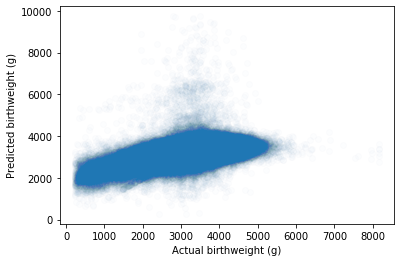

In [11]:
plt.scatter(y_test, y_pred, alpha=0.01)
plt.xlabel("Actual birthweight (g)")
plt.ylabel("Predicted birthweight (g)")
plt.show()

In [184]:
#PCA on train data to get components to retry linear regression?
#scaler = StandardScaler()
#scaler.fit(X_train)

#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

### Try using binary outcome data

### KNN

In [17]:
from sklearn import neighbors, ensemble, svm, metrics

In [12]:
dfbin = pd.read_csv('Data/MICE_data_bin.csv', index_col=[0])

/rds/general/user/cam119/home/anaconda3/envs/ML_project/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [13]:
X = dfbin.drop(['birthweight_bin'], axis=1)
y = dfbin['birthweight_bin']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [20]:
model = neighbors.KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [21]:
y_pred = model.predict(X_test)

In [22]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[867696   3685]
 [ 77519   1484]]


In [23]:
print('Number of low-bw cases in test set =', cm[1,0] + cm[1,1])
print('Number of correctly predicted low-bw cases =', cm[1,1])

Number of low-bw cases in test set = 79003
Number of correctly predicted low-bw cases = 1484


In [24]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(867696, 3685, 77519, 1484)

### SVM

In [25]:
from sklearn.svm import SVC

In [26]:
X = dfbin.drop(['birthweight_bin'], axis=1)
y = dfbin['birthweight_bin']

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X, y)

In [ ]:
def plot_svc_decision_function(model, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    X, Y = np.meshgrid(x,y)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    

    ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(svm)
plt.show()

### Decision tree

In [144]:
# preamble
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

import graphviz 

# Helper function to plot the decision tree. This uses the graphviz library.
def plot_tree(graph, feature_names=None, class_names=None):
    '''
    This method takes a DecisionTreeClassifier object, along with a list of feature names and target names
    and plots a tree. The feature names and class names can be left empty; they are just there for labelling 
    '''
    dot_data = export_graphviz(graph, out_file=None, 
                      feature_names=feature_names,  
                      class_names=class_names,  
                      filled=True, rounded=True,  
                      special_characters=True) 
    
    graph = graphviz.Source(dot_data)
    
    return graph


In [153]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [199]:
X = dfbin.drop(['birthweight_bin'], axis=1)
y = dfbin['birthweight_bin']

In [201]:
y = np.where(y == 1, 'low', 'normal')

Accuracy: 0.912


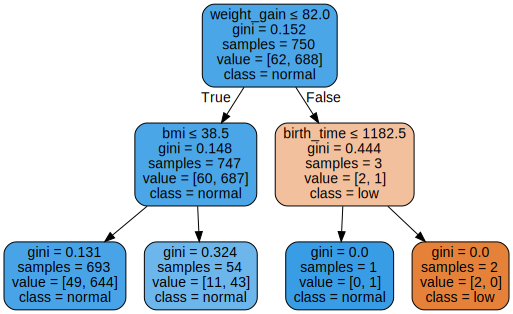

In [222]:
# Create a test-train data split. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

# Create a DecisionTreeclassifier object with default max depth.
model = DecisionTreeClassifier(max_depth=2)

# Use the DecisionTreeclassifier.fit(X, y) function to optimise the model.
fitted_model = model.fit(X_train, y_train)

# Use the DecisionTreeclassifier.predict(X) to make predictions
y_pred = model.predict(X_test)

# B7) Use metrics.accuracy_score(y_test, y_predictions) to compute accuracy scores. Print it.
full_model_accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'Accuracy: {full_model_accuracy}')

# B8) Plot the tree using plot_tree(model, feature_names, class_names)
plot_tree(fitted_model, X.columns, ['low','normal'])

In [169]:
from sklearn.model_selection import GridSearchCV

# Initiate a GridSearchCV object with the correct model, param_grid, and cv; `cv=k` does a k-fold cross-validation.
grid_search_model = GridSearchCV(DecisionTreeClassifier(random_state=2), {'max_depth':[1, 2, 3, 4, 5, 6]}, cv=15,)

# G2) use the GridSearchCV.fit(X, y) method to run the grid search with cv. 
fitted_grid_search_model = grid_search_model.fit(X, y)

Mean accurary scores:[0.91703603 0.91703603 0.9090306  0.90203528 0.89802503 0.89200965]


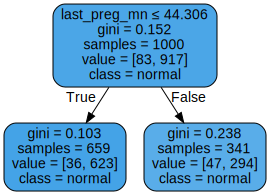

In [219]:
# The fitted GridSearchCV object has an attribute model.cv_results_ (note the underscore) that gives us a dict object with several results from the cross-valiation. 
# In particular, one of the key value pairs avaiable is 'mean_test_score', which returns the average score for each parameter value over the cv fold. 

accuracy_scores = fitted_grid_search_model.cv_results_['mean_test_score']
print(f"Mean accurary scores:{accuracy_scores}")

# Plot the best estimator I found
# GridSearchCV.best_estimator_ (again, the underscore) returns the model that performed the best. This behaves the same as the model objects from before, so we can plot it.
# Get the best model
best_tree_model = fitted_grid_search_model.best_estimator_

# Plot the best model
plot_tree(best_tree_model, X.columns, ['low','normal'])